<a href="https://colab.research.google.com/github/aryanshah19/Code-chef/blob/master/BIKE_SHARING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Modules



In [ ]:
import pandas as pd #used for dataframe
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')


# Load Dataset





In [ ]:
df=pd.read_csv('hour.csv')

In [ ]:
#statistical information
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
#unique value
df.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

# Preprocessing of data

In [ ]:
df.isnull().sum()

In [ ]:
df.rename(columns={'weathersit':'weather','yr':'year','mnth':'month','hr':'hour','hum':'humidity','cnt':'count'},inplace=True)

In [ ]:
df.head()

In [ ]:
df.drop(columns=['instant','dteday','year'])

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
cols=['season','month','hour','holiday','weekday','workingday','weather']
for col in cols:
  df[col]=df[col].astype('category')
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   year        17379 non-null  int64   
 4   month       17379 non-null  category
 5   hour        17379 non-null  category
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weather     17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  humidity    17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(5), object(1)
memory usage: 1.4+ MB


[Text(0.5, 1.0, 'Counting of bikes during weekdays and week')]

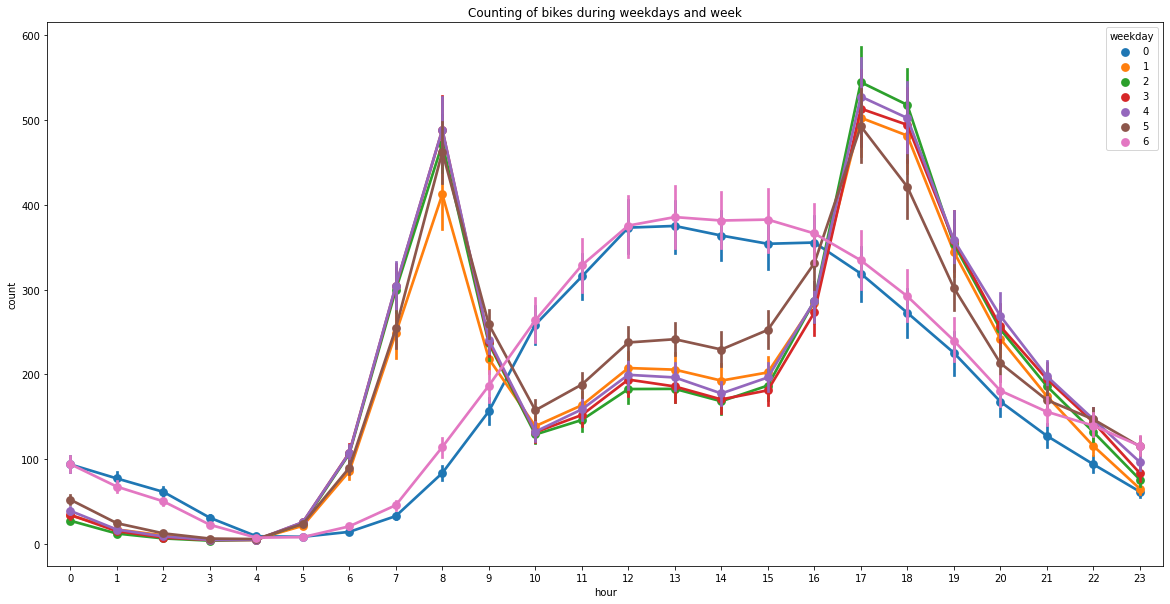

In [ ]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df,x='hour',y='count',hue='weekday',ax=ax)
ax.set(title="Counting of bikes during weekdays and week")

[Text(0.5, 1.0, 'Counting of bikes during weekdays and week for unregistered users')]

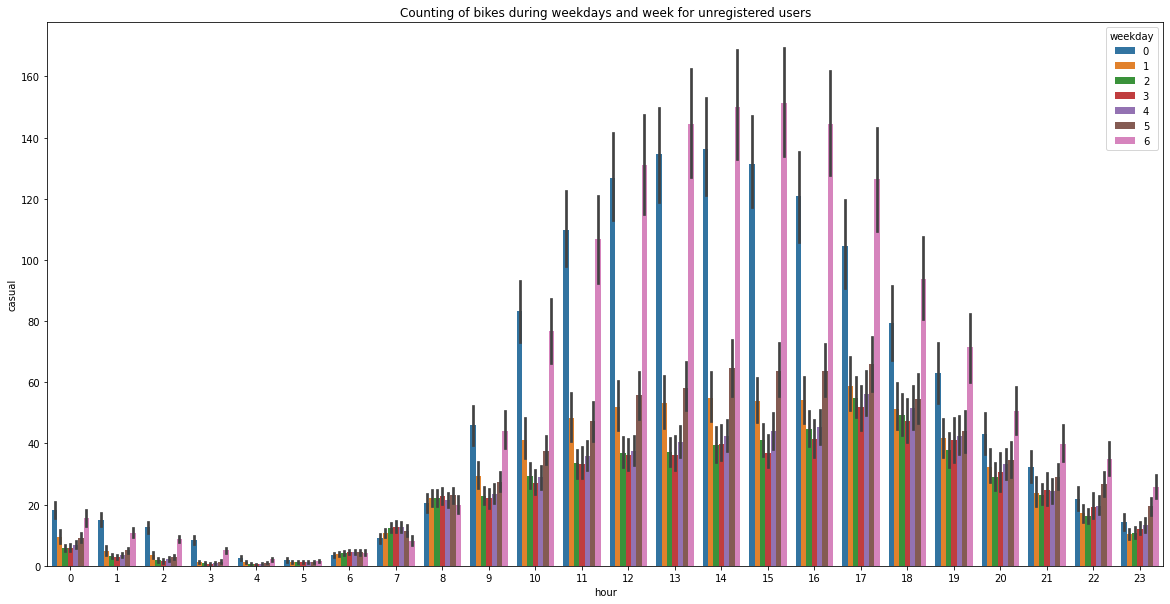

In [ ]:
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(data=df,x='hour',y='casual',hue='weekday',ax=ax)
ax.set(title="Counting of bikes during weekdays and week for unregistered users")

[Text(0.5, 1.0, 'Counting of bikes during weekdays and week for unregistered users')]

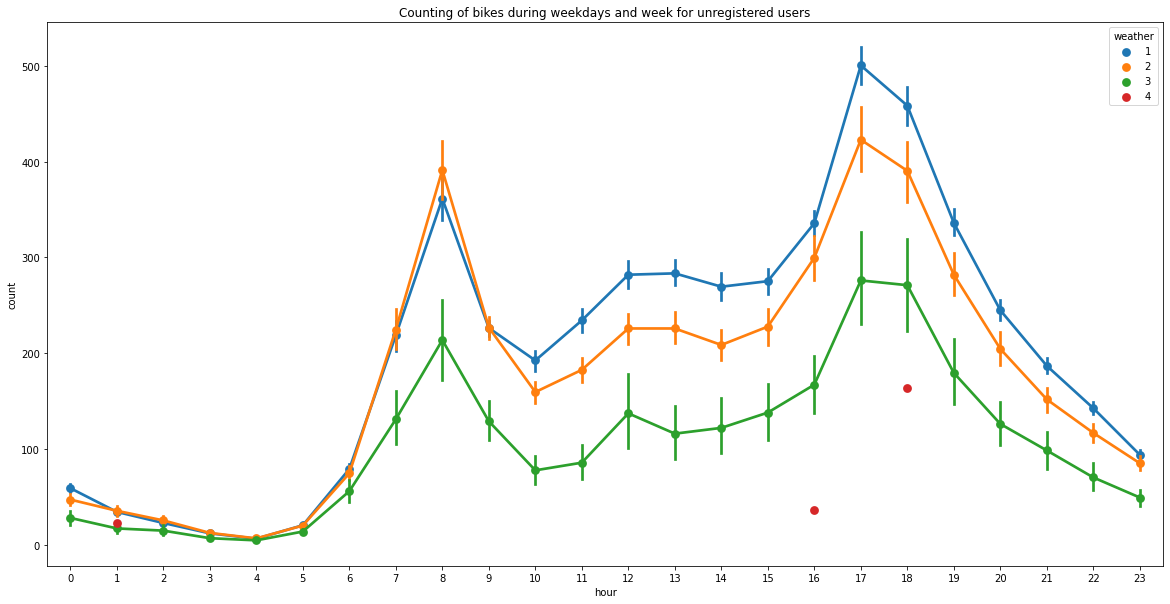

In [ ]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df,x='hour',y='count',hue='weather',ax=ax)
ax.set(title="Counting of bikes during weekdays and week for unregistered users")

[Text(0.5, 1.0, 'Relation b/w humidity and users')]

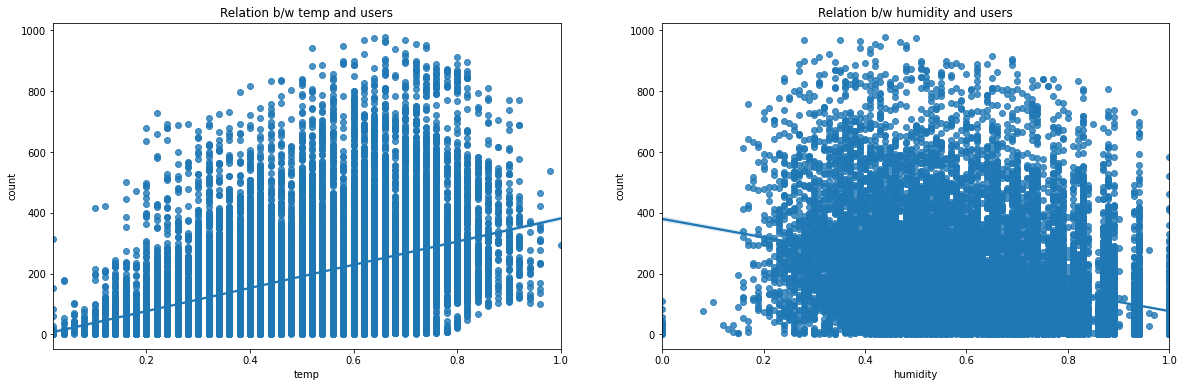

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,6))
sns.regplot(x=df['temp'],y=df['count'],ax=ax1)
ax1.set(title="Relation b/w temp and users")
sns.regplot(x=df['humidity'],y=df['count'],ax=ax2)
ax2.set(title="Relation b/w humidity and users")

## Coorelation matrix

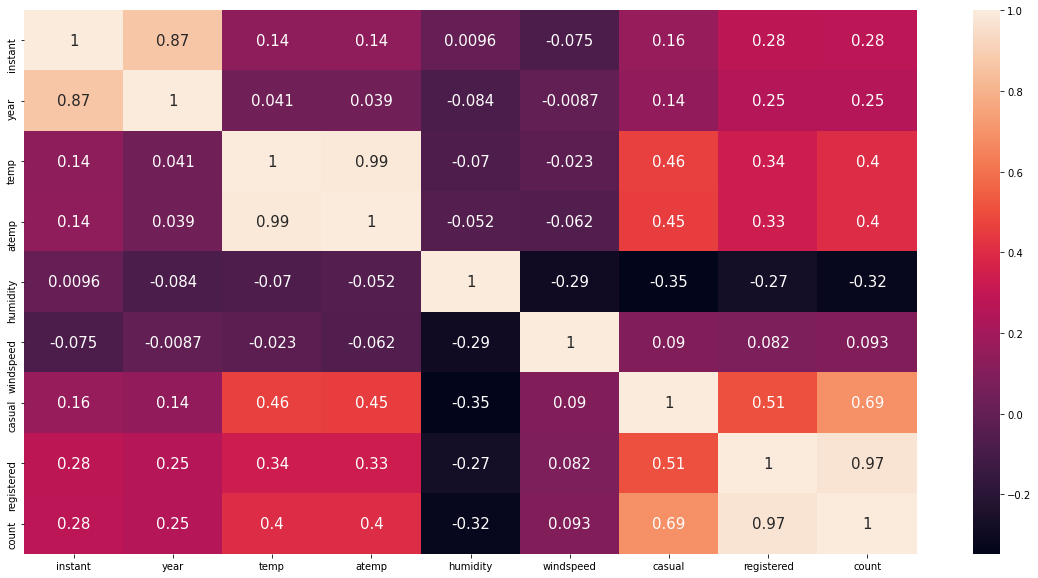

In [ ]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, annot_kws={'size':15})